In [12]:
import matplotlib.pyplot as plt 
import numpy as np
import datetime

In [109]:
import os
def get_last_lines_as_list(file, n):
    with open(file, 'rb') as f:
        if os.path.getsize(file) > 1000*n:
            f.seek(-1000*n, 2)
        data = f.readlines()
        lines = []
        for i in range(n,0,-1):
            if len(data)>i:
                lines.append(data[-i].decode("utf-8")[:-1])

    return lines

In [110]:
lines = get_last_lines_as_list('nilog.txt', 4)
for line in lines:
    print(line)

2022-09-15 13:35:04.941249
-0.01793 -0.01826 -0.01777 -0.01793 -0.01793 -0.01826 -0.01842 -0.01842 -0.01842 -0.01809 -0.01793 -0.01809 -0.01826 -0.01777 -0.01809 -0.01777 -0.01809 -0.01745 -0.01777 -0.01761 -0.01793 -0.01793 -0.01793 -0.01809 -0.01793 -0.01842 -0.01826 -0.01826 -0.01809 -0.01826 -0.01826 -0.01793 -0.01793 -0.01761 -0.01777 -0.01777 -0.01761 -0.01777 -0.01761 -0.01777 -0.01777 -0.01793 -0.01826 -0.01777 -0.01793 -0.01809 -0.01826 -0.01842 -0.01826 -0.01826 -0.01809 -0.01793 -0.01793 -0.01777 -0.01793 -0.01777 -0.01793 -0.01809 -0.01793 -0.01809 -0.01793 -0.01777 -0.01809 -0.01793 -0.01842 -0.01842 -0.01809 -0.01842 -0.01858 -0.01809 -0.01826 -0.01809 -0.01809 -0.01777 -0.01777 -0.01793 -0.01793 -0.01777 -0.01777 -0.01761 -0.01809 -0.01777 -0.01809 -0.01842 -0.01826 -0.01826 -0.01809 -0.01826 -0.01826 -0.01809 -0.01809 -0.01793 -0.01842 -0.01793 -0.01777 -0.01777 -0.01793 -0.01777 -0.01761 -0.01777 
0.00025 -0.00023 -0.00007 0.00025 -0.00007 0.00009 -0.00007 -0.00007 0.0

In [112]:

def plot_last_time(time_in_seconds, fast = None):
    if fast == None:
        if time_in_seconds>50:
            fast = True
        else:
            fast = False
            
    lines_needed = time_in_seconds*4*10
    lines = get_last_lines_as_list('nilog.txt', lines_needed)    
    times = []
    ai0 = []
    ai1 = []
    ai2 = []
    
    cont = []
    for line in lines:
        if '2022-' == line[:5]:
            if len(cont) == 4:
                times.append(datetime.datetime.fromisoformat(cont[0]))
                if fast:
                    ai0.append([float(cont[1][:8])])
                    ai1.append([float(cont[2][:8])])
                    ai2.append([float(cont[3][:8])])
                else:
                    ai0.append([float(s) for s in cont[1].split()])
                    ai1.append([float(s) for s in cont[2].split()])
                    ai2.append([float(s) for s in cont[3].split()])
            cont = [line]
        else:
            cont.append(line)
    if len(cont) == 4:
        times.append(datetime.datetime.fromisoformat(cont[0]))
        if fast:
            ai0.append([float(cont[1][:8])])
            ai1.append([float(cont[2][:8])])
            ai2.append([float(cont[3][:8])])
        else:
            ai0.append([float(s) for s in cont[1].split()])
            ai1.append([float(s) for s in cont[2].split()])
            ai2.append([float(s) for s in cont[3].split()])
        
    new_times = []
    for i, l in enumerate(ai0[1:]):
        dt = times[i+1]-times[i]
        for j, _ in enumerate(l):
            f = j/len(l)
            new_times.append(times[i] + f * dt)
            
            
    fig, axes = plt.subplots(1,3, figsize = (20,8), dpi = 100)
    colors = [[0,0.5,1,1], [1,0.5,0,1], [0,0,0,0.8]]
    for i, ai in enumerate([ai0, ai2, ai2]):
        ai = np.concatenate(ai[1:])
        axes[i].plot(new_times, ai, color = colors[i])
    axes[0].set_title(f'ai0 - loopback')
    axes[1].set_title(f'ai1 - amp voltage')
    axes[2].set_title(f'ai2 - amp current')
    return fig, axes

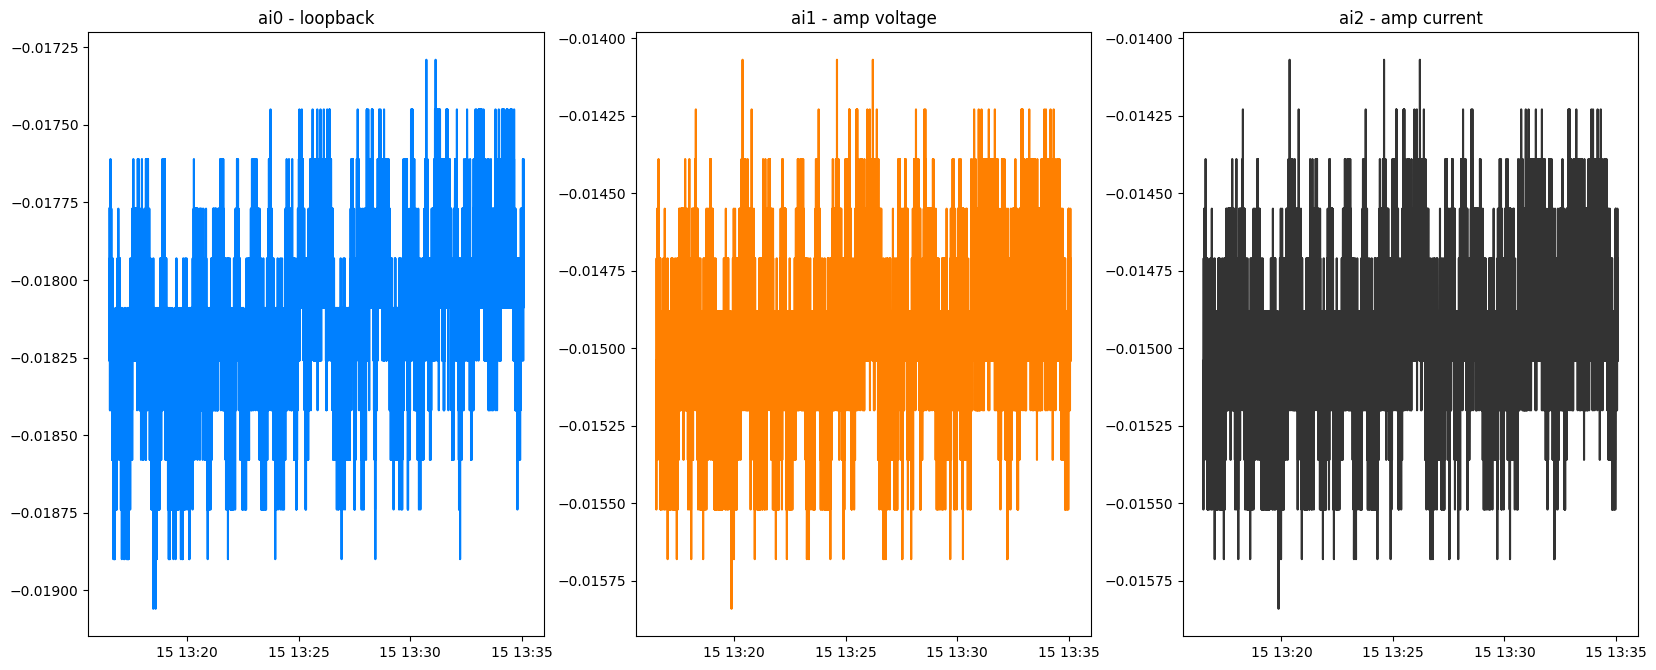

In [114]:
try:
    plt.close(fig)
except:
    print(...)
fig, axes = plot_last_time(30000)